In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def kernel_unnormalized(g1, g2,lamb):
    one = np.ones(g1.number_of_nodes())

    A1 = nx.adjacency_matrix(g1.to_undirected()).todense()
    
    A2 = nx.adjacency_matrix(g2.to_undirected()).todense()

    Lamb1,U1 = np.linalg.eigh(A1)
    Lamb2,U2 = np.linalg.eigh(A2)
    print(np.max(Lamb1), np.max(Lamb2))
    
    L = np.kron(one.transpose().dot(U1), one.transpose().dot(U2))
    R = np.kron(U1.transpose().dot(one), U2.transpose().dot(one))
    
    D = 1/(1 - lamb*np.kron(Lamb1,Lamb2))
    
    k = L.dot(np.diag(D)).dot(R.transpose())
    
    return k

def kernel_normalized(g1, g2,lamb):
    one = np.ones(g1.number_of_nodes())

    A1 = nx.adjacency_matrix(g1.to_undirected()).todense()
    D1 = 1/(1 + A1.dot(one))
    A1 = A1.dot(np.diag(1/(A1.dot(one) + 1).A.flatten()))
    
    A2 = nx.adjacency_matrix(g2.to_undirected()).todense()
    A2 = A2.dot(np.diag(1/(A2.dot(one) + 1).A.flatten()))

    Lamb1,U1 = np.linalg.eigh(A1)
    Lamb2,U2 = np.linalg.eigh(A2)
    print(np.max(Lamb1), np.max(Lamb2))
    
    L = np.kron(one.transpose().dot(U1), one.transpose().dot(U2))
    R = np.kron(U1.transpose().dot(one), U2.transpose().dot(one))
    
    D = 1/(1 - lamb*np.kron(Lamb1,Lamb2))
    #D = np.exp(lamb*np.kron(Lamb1,Lamb2))
    
    k = L.dot(np.diag(D)).dot(R.transpose())
    
    return k



In [44]:
def pairwise_kernels(graphs,lamb, kernel_func):
    n = len(graphs)
    K = np.zeros((n,n))
    for i in range(0,n):
        for j in range(i,n):
            k = kernel_func(graphs[i],graphs[j],lamb)
            K[i,j] = k
            K[j,i] = k
    return K

In [49]:
lamb = 1/40000
res = {}
for w in range(0,28,7):
    graphs = [nx.read_gml('./data/taxi-2014-NTA/12/NTACycle%02dSnap0.gml'%d) for d in range(w,w+7)]
    K = pairwise_kernels(graphs,lamb,kernel_unnormalized)
    res[w] = K

26211.7184388 26211.7184388
26211.7184388 30470.14311
26211.7184388 28426.1832211
26211.7184388 30440.6191528
26211.7184388 31112.5702774
26211.7184388 31192.9407564
26211.7184388 28055.2785312
30470.14311 30470.14311
30470.14311 28426.1832211
30470.14311 30440.6191528
30470.14311 31112.5702774
30470.14311 31192.9407564
30470.14311 28055.2785312
28426.1832211 28426.1832211
28426.1832211 30440.6191528
28426.1832211 31112.5702774
28426.1832211 31192.9407564
28426.1832211 28055.2785312
30440.6191528 30440.6191528
30440.6191528 31112.5702774
30440.6191528 31192.9407564
30440.6191528 28055.2785312
31112.5702774 31112.5702774
31112.5702774 31192.9407564
31112.5702774 28055.2785312
31192.9407564 31192.9407564
31192.9407564 28055.2785312
28055.2785312 28055.2785312
30357.0695792 30357.0695792
30357.0695792 31644.0211099
30357.0695792 29567.4356741
30357.0695792 27766.3557493
30357.0695792 29259.7676936
30357.0695792 28012.2209863
30357.0695792 25714.5698337
31644.0211099 31644.0211099
31644.02

un_normalized 2.5e-05
[ 807014.86267619  236062.25099564 -130682.43788315   84863.74061565
  -20276.87288465    9230.68546362   -1717.30259099]


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


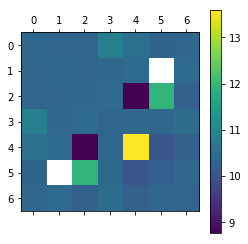

[ 224622.45489015  -52282.26329534   31024.89947733   21081.78823083
  -21329.96577491   -1008.25882986   -9022.86301312]


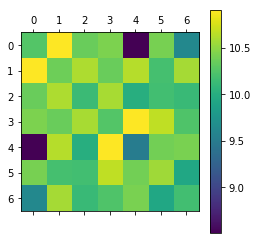

[ 214080.83649148  -29544.46056505  -18472.51922381   35412.81807129
   27498.46555326     246.7622274    12341.74806225]


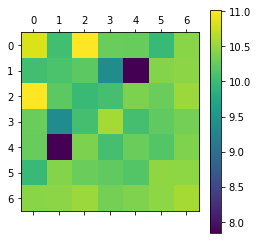

[ 224518.24823109  -56610.50245691   42608.66594946  -25074.56444832
  -12976.37953324    3707.7650444    20933.30278788]


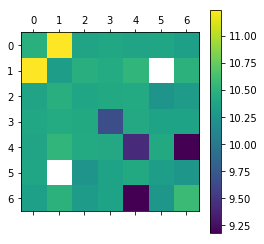

In [50]:
print('un_normalized',lamb)
for w,K in res.items():
    print(np.linalg.eigvals(K))
    plt.matshow(np.log(K))
    plt.colorbar()
    plt.show()

un_normalized 0.01
[ 206512.74292381 -140090.29218745   82067.4858317   -43198.55498872
  -30926.17141289   12409.39399869   14455.88678499]


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


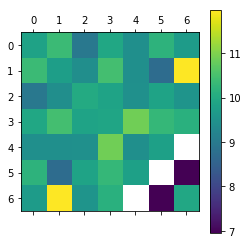

[ 115206.02244854  -44108.69836052  -22137.6083129     -441.95260293
   13865.77319836   33300.22143435   27242.33113994]


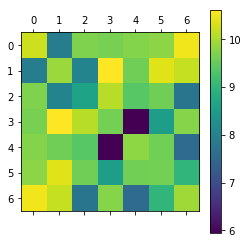

[ 418753.28624764 -417476.66561845   80608.17451914  -35649.89324042
   -1991.04482535   17732.44026067   16040.94661781]


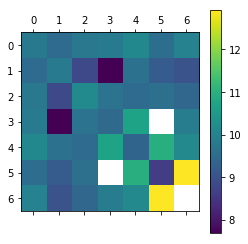

[ 174155.91921827  144286.69873624 -150227.35201779  -83987.81213092
   30298.16776844   -2277.94607778  -22320.0177208 ]


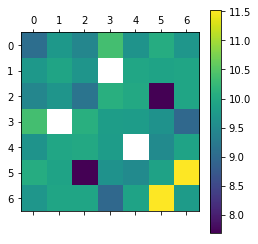

In [48]:
print('un_normalized',lamb)
for w,K in res.items():
    print(np.linalg.eigvals(K))
    plt.matshow(np.log(K))
    plt.colorbar()
    plt.show()